<a href="https://colab.research.google.com/github/Yashi95488/ProjectsDS/blob/main/Time_Series_Forecasting_for_Stock_Prices(Level_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Load Dataset
df=pd.read_csv('/content/drive/MyDrive/META.csv')

In [ ]:
#Display the Dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.557648,12077100
1,2020-01-03,207.210007,210.399994,206.949997,208.669998,208.448837,11188400
2,2020-01-06,206.699997,212.779999,206.520004,212.600006,212.374680,17058900
3,2020-01-07,212.820007,214.580002,211.750000,213.059998,212.834183,14912400
4,2020-01-08,213.000000,216.240005,212.610001,215.220001,214.991898,13475000
...,...,...,...,...,...,...,...
1084,2024-04-24,508.059998,510.000000,484.579987,493.500000,493.500000,37772700
1085,2024-04-25,421.399994,445.769989,414.500000,441.380005,441.380005,82890700
1086,2024-04-26,441.459991,446.440002,431.959991,443.290009,443.290009,32691400
1087,2024-04-29,439.559998,439.760010,428.559998,432.619995,432.619995,21502600


In [ ]:
#Display the first few rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.557648,12077100
1,2020-01-03,207.210007,210.399994,206.949997,208.669998,208.448837,11188400
2,2020-01-06,206.699997,212.779999,206.520004,212.600006,212.374680,17058900
3,2020-01-07,212.820007,214.580002,211.750000,213.059998,212.834183,14912400
4,2020-01-08,213.000000,216.240005,212.610001,215.220001,214.991898,13475000


In [ ]:
#Display info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1089 non-null   object 
 1   Open       1089 non-null   float64
 2   High       1089 non-null   float64
 3   Low        1089 non-null   float64
 4   Close      1089 non-null   float64
 5   Adj Close  1089 non-null   float64
 6   Volume     1089 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.7+ KB


In [ ]:
#Display Dimensionality of dataset
df.shape

(1089, 7)

In [ ]:
#Display the Statistical Summary
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1.089000e+03
mean,265.106492,269.017264,261.475758,265.279651,265.021994,2.474032e+07
std,89.310933,89.910210,88.447719,89.178666,89.144503,1.618508e+07
min,90.080002,90.459999,88.089996,88.910004,88.815765,5.467500e+06
25%,200.149994,203.500000,195.490005,198.860001,198.649231,1.590590e+07
50%,267.170013,270.320007,263.600006,266.630005,266.347412,2.084450e+07
75%,323.529999,328.000000,319.459991,324.170013,323.826416,2.861860e+07
max,529.280029,531.489990,518.890015,527.340027,527.340027,2.323166e+08


In [ ]:
#Data Cleaning
#Check for Missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


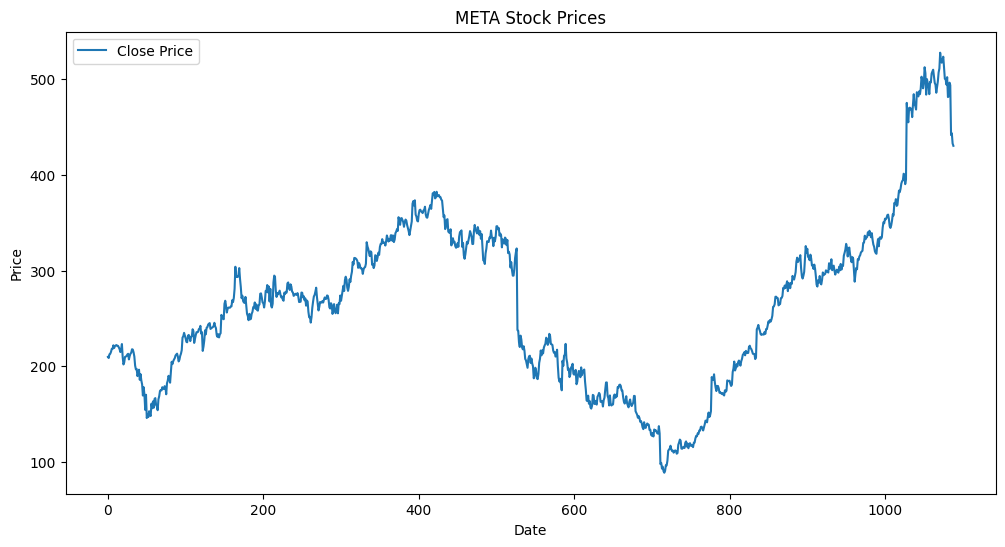

In [ ]:
#Visualize the Data
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('META Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Split Dataset into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
#Convert Data into Numpy array
train=np.asarray(train_data['Close'])
test=np.asarray(test_data['Close'])
print(f'Train: {train}')
print(f'Test: {test}')

Train: [209.779999 208.669998 212.600006 213.059998 215.220001 218.300003
 218.059998 221.910004 219.059998 221.149994 221.770004 222.139999
 221.440002 221.320007 219.759995 217.940002 214.869995 217.789993
 223.229996 209.529999 201.910004 204.190002 209.830002 210.110001
 210.850006 212.330002 213.059998 207.190002 210.759995 213.139999
 214.179993 217.800003 217.490005 214.580002 210.179993 200.720001
 196.770004 197.199997 189.75     192.470001 196.440002 185.889999
 191.759995 185.169998 181.089996 169.5      178.190002 170.240005
 154.470001 170.279999 146.009995 149.419998 146.960007 153.130005
 149.729996 148.100006 160.979996 156.210007 163.339996 156.789993
 165.949997 166.800003 159.600006 158.190002 154.179993 165.550003
 168.830002 174.279999 175.190002 174.789993 178.169998 176.970001
 176.25     179.240005 178.240005 170.800003 182.279999 185.130005
 190.070007 187.5      182.910004 194.190002 204.710007 202.270004
 205.259995 207.070007 208.470001 211.259995 212.350006

In [ ]:
#ARIMA Model
#Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  871
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2893.468
Date:                Sun, 12 Jan 2025   AIC                           5798.937
Time:                        08:14:39   BIC                           5827.548
Sample:                             0   HQIC                          5809.884
                                - 871                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0426      0.039     -1.093      0.274      -0.119       0.034
ar.L2          0.0223      0.032      0.693      0.488      -0.041       0.085
ar.L3         -0.0634      0.031     -2.019      0.043      -0.125      -0.002
ar.L4         -0.0443      0.032     -1.396      0.163      -0.106       0.018
ar.L5         -0.0164      0.036     -0.457      0.648      -0.087       0.054
sigma2        45.3199      0.711     63.727      0.000      43.926      46.714
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             33048.94
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -2.07
Prob(H) (two-sided):                  0.77   Kurtosis:                        32.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Forecasting with ARIMA
forecast=model_fit.forecast(steps=len(test_data))
forecast=pd.Series(forecast,index=test_data.index)
forecast.head()

,0
871,280.983852
872,280.334381
873,280.005689
874,279.903723
875,279.956224


In [ ]:
#Get the forecasted values
forecasted_values=np.array(forecast)
forecasted_values

array([280.98385166, 280.33438077, 280.00568903, 279.90372253,
       279.95622362, 280.00154706, 280.03245819, 280.03873517,
       280.03563648, 280.03108215, 280.02869718, 280.02810819,
       280.02840271, 280.02878057, 280.02898869, 280.02903481,
       280.02901019, 280.02897752, 280.02896003, 280.02895614,
       280.02895832, 280.0289611 , 280.02896259, 280.02896291,
       280.02896272, 280.02896248, 280.02896235, 280.02896233,
       280.02896234, 280.02896236, 280.02896237, 280.02896238,
       280.02896238, 280.02896237, 280.02896237, 280.02896237,
       280.02896237, 280.02896237, 280.02896237, 280.02896237,
       280.02896237, 280.02896237, 280.02896237, 280.02896237,
       280.02896237, 280.02896237, 280.02896237, 280.02896237,
       280.02896237, 280.02896237, 280.02896237, 280.02896237,
       280.02896237, 280.02896237, 280.02896237, 280.02896237,
       280.02896237, 280.02896237, 280.02896237, 280.02896237,
       280.02896237, 280.02896237, 280.02896237, 280.02

In [ ]:
#Evaluate ARIMA model
rmse = np.sqrt(mean_squared_error(test,forecasted_values))
mae = mean_absolute_error(test,forecasted_values)
print(f'ARIMA RMSE: {rmse} , ARIMA MAE: {mae}')


ARIMA RMSE: 118.45643751684403 , ARIMA MAE: 87.35677402733457


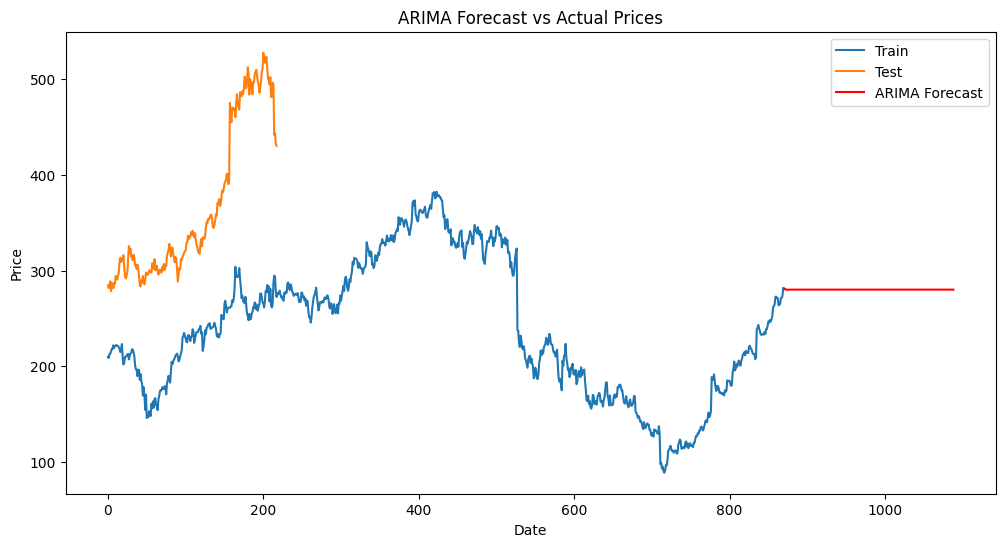

In [ ]:
#Plot ARIMA results
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='ARIMA Forecast',color='red')
plt.title('ARIMA Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#LSTM Model
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
scaled_data


array([[0.27568823],
       [0.27315646],
       [0.28212028],
       ...,
       [0.8082932 ],
       [0.78395633],
       [0.77836825]])

In [ ]:
#Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
  X,y = [], []
  for i in range(len(dataset)-time_step-1):
    X.append(dataset[i:(i+time_step), 0])
    y.append(dataset[i+time_step, 0])
  return np.array(X), np.array(y)

#Number of previous days to consider for prediction
time_step=60
#Pass the scaled_data to func
X,y = create_dataset(scaled_data,time_step)



In [ ]:
#Reshape Input to be [samples,time_steps,features]
X = X.reshape(X.shape[0],X.shape[1],1)
X.shape

(1028, 60, 1)

In [ ]:
#Split into training and testing sets
X_train, X_test = X[:train_size - time_step -1], X[train_size - time_step -1:]
y_train, y_test = y[:train_size - time_step - 1], y[train_size - time_step - 1:]

In [ ]:
#Build LSTM Model
LSTM_model = Sequential()
LSTM_model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(50,return_sequences=False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1))


In [ ]:
#Compile the model
LSTM_model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the LSTM_model
LSTM_model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0484
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0042
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0028
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0023
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0023
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0025
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0021
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0025
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0025
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0017
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0018
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0022
Epoch 13/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0019
Epoch 14/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0017
Epoch 15/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0016
Epoc

In [ ]:
#Make Predictions
LSTM_pred = LSTM_model.predict(X_test)
LSTM_pred = scaler.inverse_transform(LSTM_pred)
LSTM_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step


array([[270.97836],
       [273.06393],
       [275.52258],
       [277.53665],
       [279.48444],
       [281.62726],
       [282.27783],
       [283.1543 ],
       [283.75528],
       [283.64392],
       [283.84747],
       [284.03174],
       [285.2507 ],
       [286.54642],
       [287.55673],
       [288.74808],
       [290.41006],
       [293.53973],
       [297.58633],
       [301.05148],
       [304.02658],
       [306.5258 ],
       [308.9439 ],
       [309.20392],
       [307.2124 ],
       [303.8723 ],
       [300.52188],
       [298.04233],
       [298.00674],
       [301.06583],
       [304.54285],
       [308.4514 ],
       [311.0094 ],
       [312.41318],
       [312.6697 ],
       [313.0146 ],
       [312.78906],
       [311.31076],
       [309.41293],
       [306.9479 ],
       [305.06744],
       [303.1479 ],
       [300.47488],
       [296.5662 ],
       [292.25613],
       [289.0956 ],
       [286.63013],
       [285.73972],
       [284.8738 ],
       [284.0459 ],


In [ ]:
#Evaluate LSTM Model
LSTM_rmse = np.sqrt(mean_squared_error(y_test,LSTM_pred))
LSTM_mae = mean_absolute_error(y_test,LSTM_pred)
print(f'LSTM RMSE: {LSTM_rmse} , LSTM MAE: {LSTM_mae}')

LSTM RMSE: 364.3288499465303 , LSTM MAE: 356.76076342052323


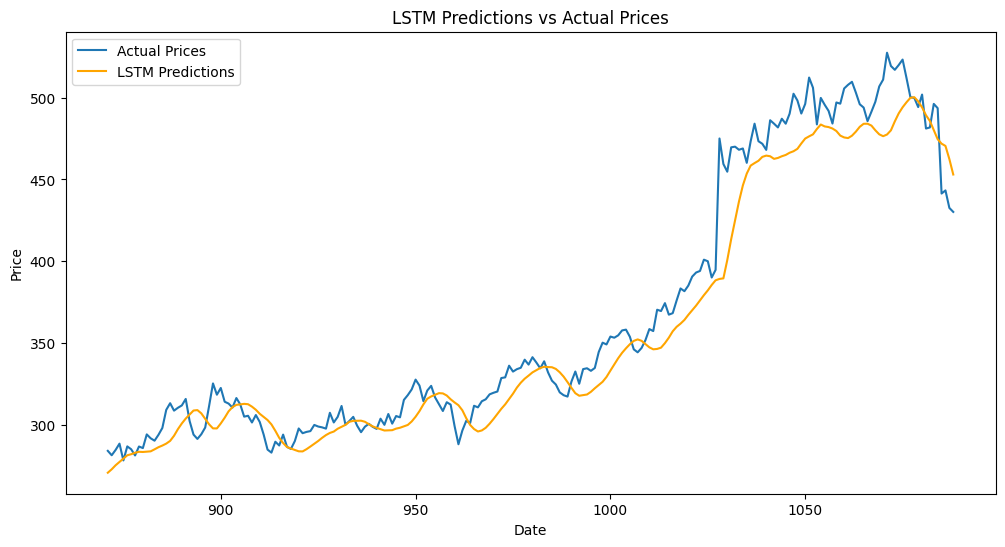

In [ ]:
#Plot LSTM Model
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size:],test,label='Actual Prices')
plt.plot(df.index[train_size:],LSTM_pred,label='LSTM Predictions',color='orange')
plt.title('LSTM Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

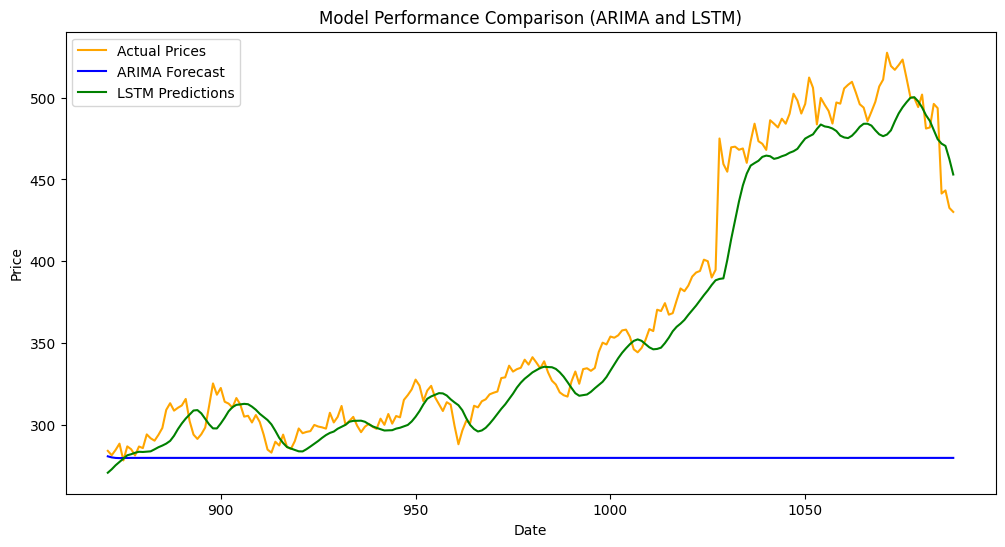

In [ ]:
#Comparing performance of both the models
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size:],test,label='Actual Prices',color='orange')
plt.plot(df.index[train_size:],forecasted_values,label='ARIMA Forecast',color='blue')
plt.plot(df.index[train_size:],LSTM_pred,label='LSTM Predictions',color='green')
plt.title('Model Performance Comparison (ARIMA and LSTM)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()